#  Party words!

In [1]:
import pandas as pd
import numpy as np

In [2]:
two_party_words = pd.read_csv("../data/two.csv")
two_party_words.head()

,Unnamed: 0,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

#make it so that we only show first 4 decimals for floats
np.set_printoptions(precision=4,suppress=True)

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
party_dummies = pd.get_dummies(two_party_words.party_x).astype(int)
party_dummies = party_dummies[["R"]]
party_dummies.head()
capitol_words = party_dummies.merge(two_party_words, right_index=True, left_index=True)

#del capitol_words['Unnamed: 0']
capitol_words.head()

,R,title_x,firstname,middlename,lastname,name_suffix,nickname,party_x,state_x,district_x,...,ziegler,zimbabwe,zimmer,zinc,zion,zoberman,zone,zones,zoo,zuni
0,0,Rep,Neil,NaN,Abercrombie,NaN,NaN,D,HI,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Rep,Gary,L.,Ackerman,NaN,NaN,D,NY,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Rep,Robert,B.,Aderholt,NaN,NaN,R,AL,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Sen,Daniel,Kahikina,Akaka,NaN,NaN,D,HI,Junior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Sen,Wayne,A.,Allard,NaN,NaN,R,CO,Senior Seat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Histgram for words
Must of my histograms will look in this razy way because I'm delaing with a sparse matrix. So a lot of this words are not mentioned a lot. There is not one word that is mentioned consitently by more than 40% percent of the people as their top word.

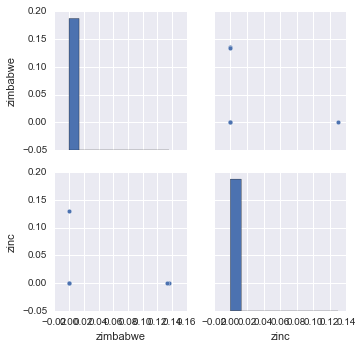

In [24]:
sns.pairplot(capitol_words[["zimbabwe","zinc"]])

In [45]:
word_columns = capitol_words.columns[807:]
capitol_words[word_columns]
capitol_words.R.head()
X_words = capitol_words[word_columns]
y_words = capitol_words["R"]
X_train,X_test,y_train,y_test = train_test_split(X_words,y_words,test_size=0.4)

from sklearn.tree import DecisionTreeClassifier
words_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
words_tree.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [57]:
words_tree.feature_importances_
features = pd.DataFrame({'feature':word_columns, 'importance':words_tree.feature_importances_}).sort_values(by='importance',ascending=False)

In [59]:
features.head()

,feature,importance
10505,requesting,0.438227
11635,spending,0.315901
6574,iraq,0.177874
927,authority,0.067998
0,a&m,0.000000
